# Prepping the Dataset


In [ ]:
import pandas as pd

# importing a Kaggle dataset on Microsoft's historical stock prices from 2000 to 2023

df = pd.read_csv('MSFT.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1/3/2000,58.687500,59.312500,56.000000,58.281250,36.132248,53228400
1,1/4/2000,56.781250,58.562500,56.125000,56.312500,34.911709,54119000
2,1/5/2000,55.562500,58.187500,54.687500,56.906250,35.279816,64059600
3,1/6/2000,56.093750,56.937500,54.187500,55.000000,34.098019,54976600
4,1/7/2000,54.312500,56.125000,53.656250,55.718750,34.543629,62013600
...,...,...,...,...,...,...,...
6007,11/16/2023,370.959991,376.350006,370.179993,376.170013,376.170013,27182300
6008,11/17/2023,373.609985,374.369995,367.000000,369.850006,369.850006,40157000
6009,11/20/2023,371.220001,378.869995,371.000000,377.440002,377.440002,52465100
6010,11/21/2023,375.670013,376.220001,371.119995,373.070007,373.070007,28423100


Want to keep things simple by focusing only on the Date and Close, so only those columns should be selected.

In [ ]:
df = df[['Date', 'Close']]

df

,Date,Close
0,1/3/2000,58.281250
1,1/4/2000,56.312500
2,1/5/2000,56.906250
3,1/6/2000,55.000000
4,1/7/2000,55.718750
...,...,...
6007,11/16/2023,376.170013
6008,11/17/2023,369.850006
6009,11/20/2023,377.440002
6010,11/21/2023,373.070007


In [ ]:
df['Date']

,Date
0,1/3/2000
1,1/4/2000
2,1/5/2000
3,1/6/2000
4,1/7/2000
...,...
6007,11/16/2023
6008,11/17/2023
6009,11/20/2023
6010,11/21/2023


We can see that the date is listed as an object, but want it to be a date. So, we can create a function to convert any string into a date time.

In [ ]:
import datetime

def str_to_datetime(s):
  split = s.split('/') #splitting the date string where the slash occurs to separate month, date, and year
  month, day, year = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(month=month, day=day, year=year)

# Testing the function:

datetime_object = str_to_datetime('1/3/2000')
datetime_object

datetime.datetime(2000, 1, 3, 0, 0)

Need to apply the function to the entire dataset to turn the date strings into actual date objects

In [ ]:
df['Date'] = df['Date'].apply(str_to_datetime) # passing the function to the apply function, not calling it
df['Date']

<ipython-input-21-86109a141a86>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime) # passing the function to the apply function, not calling it


,Date
0,2000-01-03
1,2000-01-04
2,2000-01-05
3,2000-01-06
4,2000-01-07
...,...
6007,2023-11-16
6008,2023-11-17
6009,2023-11-20
6010,2023-11-21


We can see now that the datatype is listed as a datetime64, which is what we want.  

In [ ]:
df

,Date,Close
0,2000-01-03,58.281250
1,2000-01-04,56.312500
2,2000-01-05,56.906250
3,2000-01-06,55.000000
4,2000-01-07,55.718750
...,...,...
6007,2023-11-16,376.170013
6008,2023-11-17,369.850006
6009,2023-11-20,377.440002
6010,2023-11-21,373.070007


Last step is to make the date the index for the dataset. Currently, the index is the integers listed on the left.

In [ ]:
df.index = df.pop('Date')
df

,Close
Date,
2000-01-03,58.281250
2000-01-04,56.312500
2000-01-05,56.906250
2000-01-06,55.000000
2000-01-07,55.718750
...,...
2023-11-16,376.170013
2023-11-17,369.850006
2023-11-20,377.440002


# Plotting Our Data


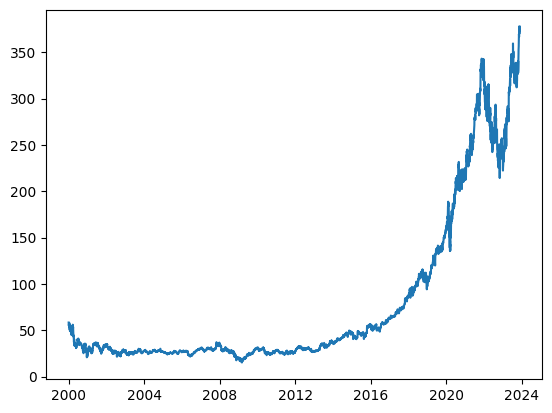

In [ ]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])

In [ ]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date = str_to_datetime(last_date_str)

  target_date = first_date

  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)

    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

    if last_time:
      break

    target_date = next_date

    if target_date == last_date:
      last_time = True

  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates

  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]

  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '11/25/2022'
windowed_df = df_to_windowed_df(df,
                                '11/25/2022',
                                '11/22/2023',
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2022-11-25,242.050003,245.029999,247.580002,247.490005
1,2022-11-28,245.029999,247.580002,247.490005,241.759995
2,2022-11-29,247.580002,247.490005,241.759995,240.330002
3,2022-11-30,247.490005,241.759995,240.330002,255.139999
4,2022-12-01,241.759995,240.330002,255.139999,254.690002
...,...,...,...,...,...
245,2023-11-16,366.679993,370.269989,369.670013,376.170013
246,2023-11-17,370.269989,369.670013,376.170013,369.850006
247,2023-11-20,369.670013,376.170013,369.850006,377.440002
248,2023-11-21,376.170013,369.850006,377.440002,373.070007


In [ ]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((250,), (250, 3, 1), (250,))

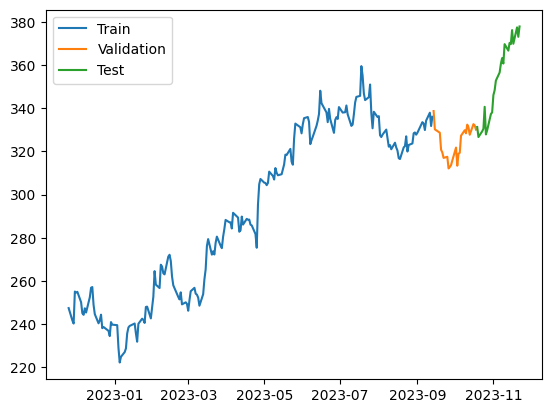

In [ ]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - loss: 86854.6250 - mean_absolute_error: 292.1835 - val_loss: 104987.8828 - val_mean_absolute_error: 323.9315
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 84906.0469 - mean_absolute_error: 288.7871 - val_loss: 104896.9609 - val_mean_absolute_error: 323.7912
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 84959.4062 - mean_absolute_error: 289.0359 - val_loss: 104742.8984 - val_mean_absolute_error: 323.5532
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 88082.2109 - mean_absolute_error: 294.4153 - val_loss: 104528.9219 - val_mean_absolute_error: 323.2224
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 87483.1641 - mean_absolute_error: 293.1861 - val_loss: 104248.0234 - val_mean_absolute_error: 322.7875
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 85406.4688 - mean_absolute_error: 289.7688 - val_loss: 103910.1719 - val_mean_absolute_error: 322.2638
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step  


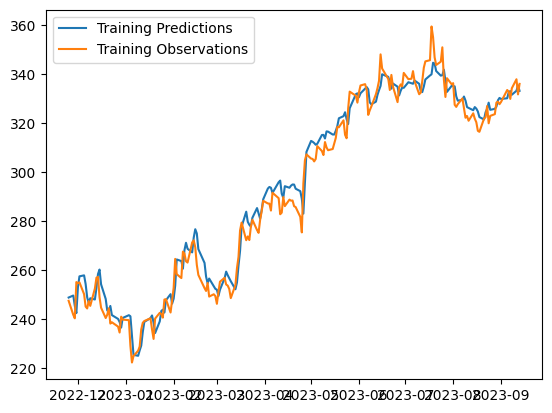

In [ ]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


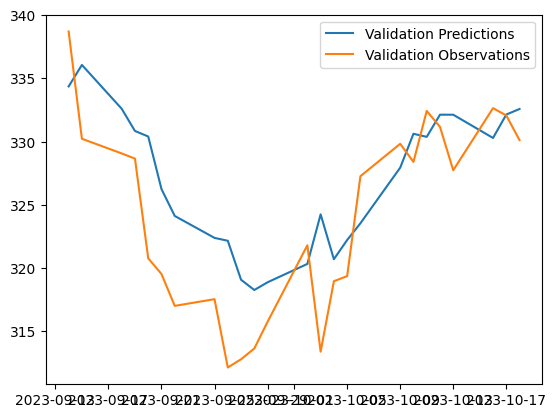

In [ ]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


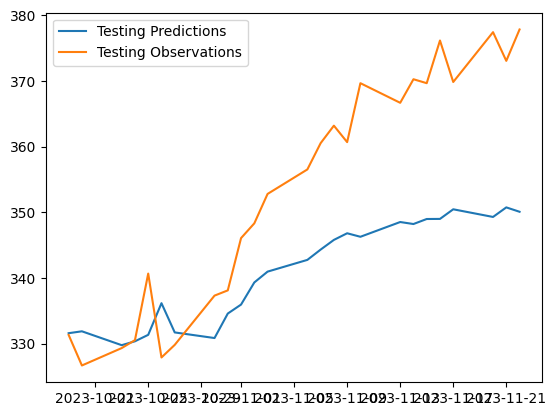

In [ ]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

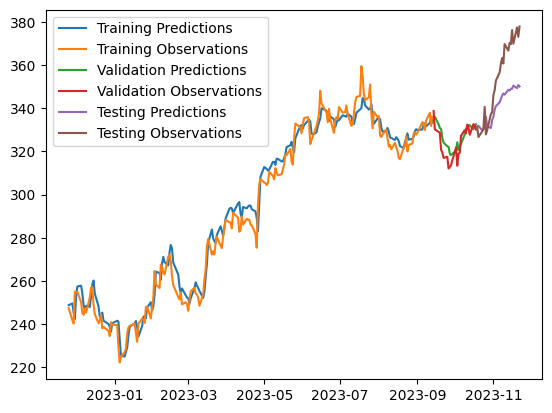

In [ ]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])

In [ ]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━

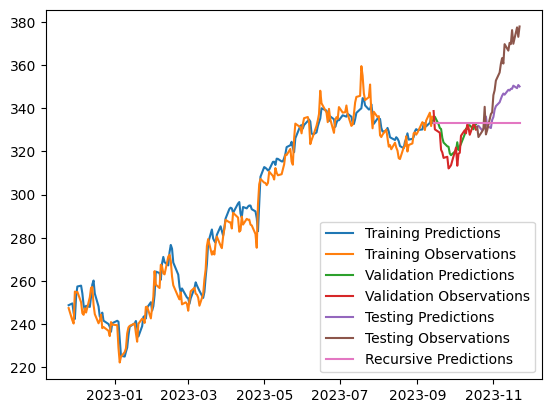

In [ ]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations',
            'Recursive Predictions'])